In [1]:
import datetime as dt

import numpy as np
import pandas_datareader.data as web
import yfinance as yf
from IPython.display import VimeoVideo

yf.pdr_override()

In [2]:
start = dt.date(2019,12,26)
end = dt.date(2023,12,26)

df = web.DataReader(["^NSEI","^NSEBANK","^BSESN","NIFTY_FIN_SERVICE.NS"],start,end)["Adj Close"]

[*********************100%%**********************]  4 of 4 completed


In [3]:
df

,NIFTY_FIN_SERVICE.NS,^BSESN,^NSEBANK,^NSEI
Date,,,,
2019-12-26,14523.700195,41163.761719,31997.328125,12126.549805
2019-12-27,14679.349609,41575.140625,32411.972656,12245.799805
2019-12-30,14650.599609,41558.000000,32354.523438,12255.849609
2019-12-31,14557.400391,41253.738281,32161.277344,12168.450195
2020-01-01,14574.200195,NaN,NaN,12182.500000
...,...,...,...,...
2023-12-18,21444.900391,71315.093750,47867.699219,21418.650391
2023-12-19,21434.449219,71437.187500,47870.898438,21453.099609
2023-12-20,21201.250000,70506.312500,47445.300781,21150.150391


In [4]:
df.describe()

,NIFTY_FIN_SERVICE.NS,^BSESN,^NSEBANK,^NSEI
count,980.000000,989.000000,988.000000,991.000000
mean,16367.006935,53134.962294,35251.364869,15774.559293
std,3118.541755,10278.269876,7561.014746,3110.151463
min,8298.500000,25981.240234,16917.453125,7610.250000
25%,14677.762207,46874.359375,31392.597656,13711.700195
50%,17126.500000,56598.281250,36069.007812,16887.349609
75%,18685.899902,60545.609375,41298.108398,17956.549805
max,21529.750000,71483.750000,48143.550781,21456.650391


In [5]:
df["FINNIFTY"] = df["NIFTY_FIN_SERVICE.NS"]
df["SENSEX"] = df["^BSESN"]
df["BANKNIFTY"] = df["^NSEBANK"]
df["NIFTY"] = df["^NSEI"]
df.drop(columns=["NIFTY_FIN_SERVICE.NS", "^BSESN", "^NSEBANK", "^NSEI"], inplace=True)


In [6]:
df

,FINNIFTY,SENSEX,BANKNIFTY,NIFTY
Date,,,,
2019-12-26,14523.700195,41163.761719,31997.328125,12126.549805
2019-12-27,14679.349609,41575.140625,32411.972656,12245.799805
2019-12-30,14650.599609,41558.000000,32354.523438,12255.849609
2019-12-31,14557.400391,41253.738281,32161.277344,12168.450195
2020-01-01,14574.200195,NaN,NaN,12182.500000
...,...,...,...,...
2023-12-18,21444.900391,71315.093750,47867.699219,21418.650391
2023-12-19,21434.449219,71437.187500,47870.898438,21453.099609
2023-12-20,21201.250000,70506.312500,47445.300781,21150.150391


### Charting prices over 2020
If we ever want to get a quick plot of the DataFrame's data, we can use the aptly named plot() method. As shown below to chart the 2020 returns of these 3 assets

<AxesSubplot:xlabel='Date'>

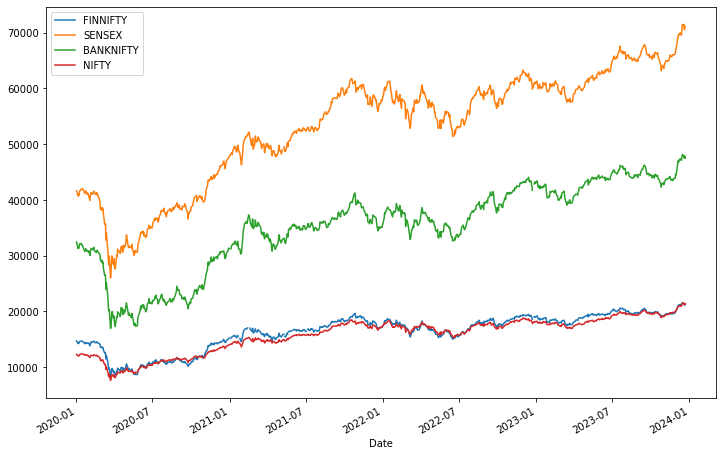

In [7]:
df["2020-01-02":"2023-12-26"].plot(figsize=(12, 8))

The following chart illustrates why using price alone is not ideal for comparing two assets. The scale of Sensex and BankNifty price versus a low-price Index like FinNifty and Nifty makes it very hard to compare the two when deciding which is better to invest in.

## 2. Calculating Return on Investment

If we invested \\ 100,000 Rs into each of these assets 4 years ago, just before covid, how much money would we have today?

To answer this question, we first need to determine how many shares of each stock we could buy with 100,000 Rs at the start of our date range. For the purpose of this exercise, We will use 02/01/2020 as our starting point because its the first working day of the year 2020.

- FinNifty = 100000/14697.5 = 6.8 Shares
- Sensex = 100000/41626.641 = 2.4 Shares
- BankNifty = 100000/32443.473 = 3.08 Shares
- Nifty = 100000/12282.2 = 8.14 Shares

It's a relatively recent phenomenon that retail brokers offer fractional shares, but this tends to be the case nowadays for most commonly used brokers. For this exercise, we will assume we can have fractional shares.

Now, to determine how much money we would have today, we look at the most recent date in our data set (12/22/2023), get the prices of each asset, and multiply our number of shares by this number. We can find this by looking at the bottom of our data set in Figure 4 using the *tail()* method:

In [8]:
np.round(df.tail(3),3)

,FINNIFTY,SENSEX,BANKNIFTY,NIFTY
Date,,,,
2023-12-20,21201.25,70506.312,47445.301,21150.150
2023-12-21,21326.00,70865.102,47840.148,21255.051
2023-12-22,21197.15,71106.961,47491.852,21349.400


In [9]:
print("Nifty = ",  8.14*21349.4)
print("Bank Nifty = ",  3.08*47491.852)
print("FinNifty = ",  6.8*21197.15)
print("SenSex = ",  2.4*71106.961)

Nifty =  173784.11600000004
Bank Nifty =  146274.90416
FinNifty =  144140.62
SenSex =  170656.7064


Wow. All 4 of these assets are giving decent returns. Nifty and Sensex are clearly the standout asset in this case, turning \\100,000 into a whopping \\173784.11. While Nifty clearly outperformed the other two assets over the last 4 years, past performance does not necessarily indicate future performance.

These assets were relatively easy to compare here since we started with \\100,000 in each. If we had started with different values, we would need to calculate the returns for an apples-to-apples comparison. In a future lesson, we will go over simple and log returns, but for the purpose of simplicity, we will use simple returns:

Simple Returns Formula

$$R_{simple} = \frac{p_{_1} - p_{_0}}{p_{_0}}$$

where $p_{_1}$ = final value, $p_{_0}$ = initial value

This will be easy in our case since \100,000 is the initial value in all three situations:

In [10]:
print("Nifty = ",  round((21349.4-12282.2)*100/12282.2),"%")
print("Bank Nifty = ",  round((47491.852-32443.473)*100/32443.473),"%")
print("FinNifty = ",  round((21197.15-14697.5)*100/14697.5),"%")
print("SenSex = ",  round((71106.961-41626.641)*100/41626.641),"%")

Nifty =  74 %
Bank Nifty =  46 %
FinNifty =  44 %
SenSex =  71 %


## 3. Comparing Indices to Bonds
Let's introduce one more asset class here—bonds. bonds not only have the return of principal but they also return a coupon, usually annually or quarterly. To simplify things, we will use an exchange traded fund (ETF), which tracks bonds. The ETF is the UTI Medium to Long Duration Fund Direct Growth or UTI Bond Fund. 

The following code snippet will pull UTI data and join it with our current DataFrame, df

In [11]:
df = df.join(web.DataReader(["0P0000XVSF.BO"],start,end)["Adj Close"])
df.rename(columns={"Adj Close": "UTIBondFund"}, inplace=True)

[*********************100%%**********************]  1 of 1 completed


In [12]:
df.tail()

,FINNIFTY,SENSEX,BANKNIFTY,NIFTY,UTIBondFund
Date,,,,,
2023-12-18,21444.900391,71315.093750,47867.699219,21418.650391,70.158501
2023-12-19,21434.449219,71437.187500,47870.898438,21453.099609,70.152603
2023-12-20,21201.250000,70506.312500,47445.300781,21150.150391,70.169998
2023-12-21,21326.000000,70865.101562,47840.148438,21255.050781,70.133202
2023-12-22,21197.150391,71106.960938,47491.851562,21349.400391,70.127502


### 3.1 Calculate log returns, remove unused columns, and drop nulls

We need to remove the nulls for the weekend dates

In [13]:
df.isna().sum()

FINNIFTY       11
SENSEX          2
BANKNIFTY       3
NIFTY           0
UTIBondFund    21
dtype: int64

In [14]:
df.dropna(inplace=True)

In [15]:
df.isna().sum()

FINNIFTY       0
SENSEX         0
BANKNIFTY      0
NIFTY          0
UTIBondFund    0
dtype: int64

In [16]:
df["NIFTY"] = np.log(df.NIFTY)-np.log(df.NIFTY.shift(1))
df["BANKNIFTY"] = np.log(df.BANKNIFTY)-np.log(df.BANKNIFTY.shift(1))
df["FINNIFTY"] = np.log(df.FINNIFTY)-np.log(df.FINNIFTY.shift(1))
df["SENSEX"] = np.log(df.SENSEX)-np.log(df.SENSEX.shift(1))
df["UTIBondFund"] = np.log(df.UTIBondFund)-np.log(df.UTIBondFund.shift(1))

In [17]:
df.head()

,FINNIFTY,SENSEX,BANKNIFTY,NIFTY,UTIBondFund
Date,,,,,
2019-12-26,NaN,NaN,NaN,NaN,NaN
2019-12-27,0.010660,0.009944,0.012875,0.009786,0.001108
2019-12-30,-0.001960,-0.000412,-0.001774,0.000820,0.000725
2019-12-31,-0.006382,-0.007348,-0.005991,-0.007157,0.000217
2020-01-02,0.009578,0.008999,0.008736,0.009305,0.001079


In [20]:
df = df.iloc[1:]

In [21]:
df.head()

,FINNIFTY,SENSEX,BANKNIFTY,NIFTY,UTIBondFund
Date,,,,,
2019-12-27,0.010660,0.009944,0.012875,0.009786,0.001108
2019-12-30,-0.001960,-0.000412,-0.001774,0.000820,0.000725
2019-12-31,-0.006382,-0.007348,-0.005991,-0.007157,0.000217
2020-01-02,0.009578,0.008999,0.008736,0.009305,0.001079
2020-01-03,-0.009351,-0.003900,-0.011613,-0.004533,0.000348


In [23]:
df.describe()[["NIFTY","FINNIFTY"]]

,NIFTY,FINNIFTY
count,956.000000,956.000000
mean,0.000592,0.000395
std,0.013365,0.017451
min,-0.139038,-0.173623
25%,-0.004489,-0.006033
50%,0.001214,0.000768
75%,0.007256,0.008065
max,0.102312,0.141521


In [25]:
((df[["NIFTY","FINNIFTY","SENSEX","BANKNIFTY"]].mean() + 1).pow(200) - 1) * 100

NIFTY        12.557824
FINNIFTY      8.229267
SENSEX       12.111578
BANKNIFTY     8.610642
dtype: float64

<AxesSubplot:xlabel='Date'>

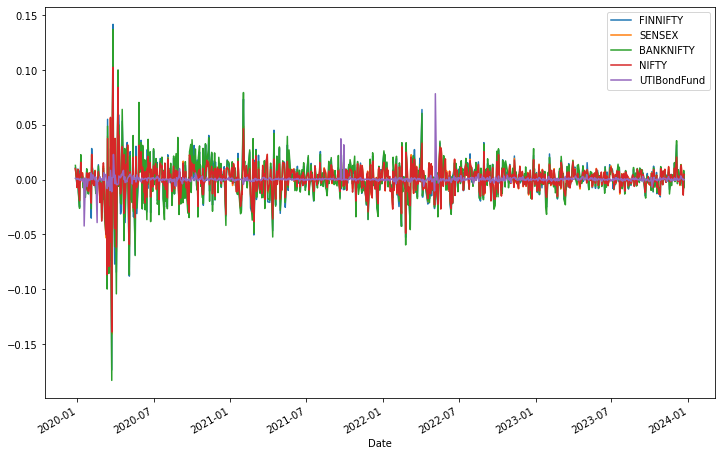

In [28]:
df.plot(figsize=(12,8))

(-0.15, 0.15)

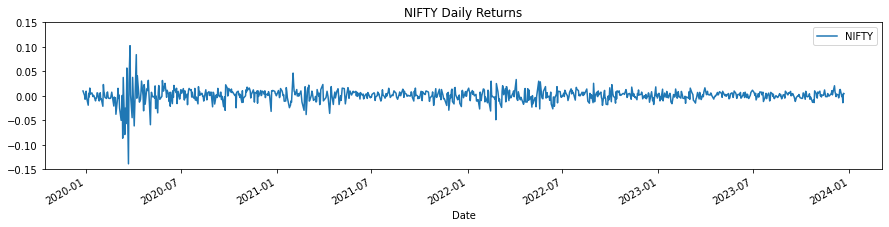

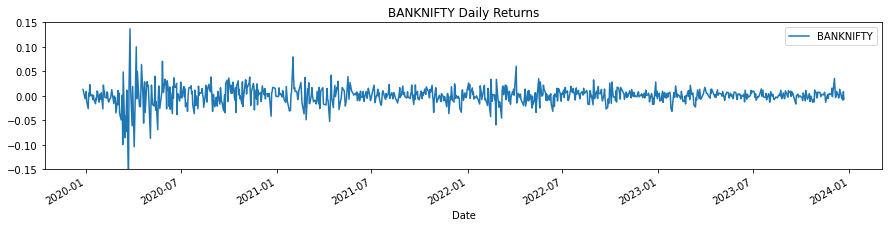

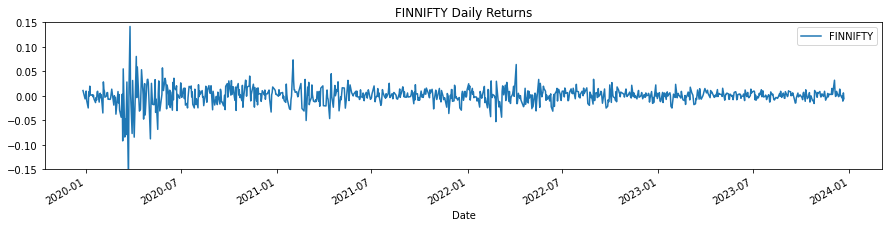

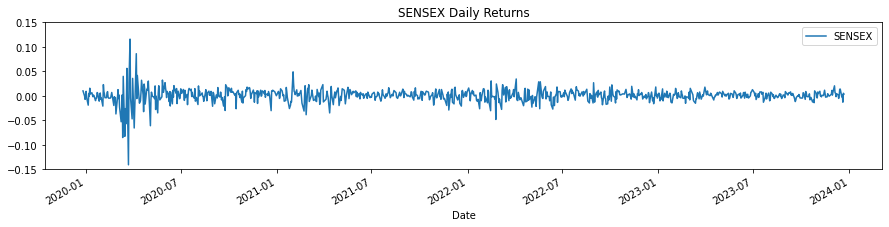

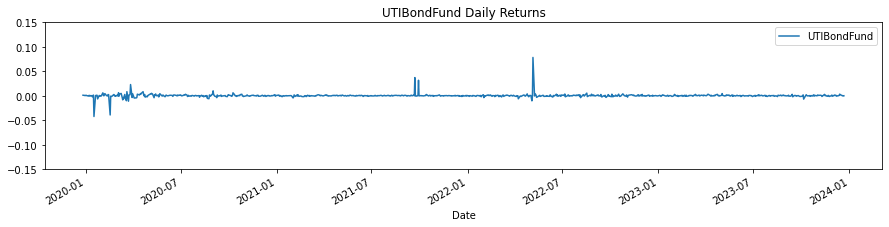

In [32]:
ax1 = df.plot(figsize=(15,3), y='NIFTY',title = 'NIFTY Daily Returns')
ax2 = df.plot(figsize=(15,3), y='BANKNIFTY',title = 'BANKNIFTY Daily Returns')
ax3 = df.plot(figsize=(15,3), y='FINNIFTY',title = 'FINNIFTY Daily Returns')
ax4 = df.plot(figsize=(15,3), y='SENSEX',title = 'SENSEX Daily Returns')
ax5 = df.plot(figsize=(15,3), y='UTIBondFund',title = 'UTIBondFund Daily Returns')

ax1.set_ylim(-0.15,0.15)
ax2.set_ylim(-0.15,0.15)
ax3.set_ylim(-0.15,0.15)
ax4.set_ylim(-0.15,0.15)
ax5.set_ylim(-0.15,0.15)

## This Analysis Shows that BankNifty is most volatile in all the indices followed by FinNifty while Bonds are least Volatile